# Gradient Descent Algorithm - Example 1

## Computing the minimum of a function

Suppose we want to find the minimum of the function $$ f(x,y) = (x-47)^2 + (y - 0.1)^2 + 2. $$

In [1]:
#------------------------
# Import packages
#------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm


# Change the plotting style
plt.style.use('seaborn-whitegrid')

# Uncomment to make pictures interactive
# %matplotlib notebook
%matplotlib inline

We create the functions for our calculations such as $f$ and the gradient of $f$.

In [2]:
#------------------------
# Create functions
#------------------------

# Input into the fuctions is vector X, where X = (x,y)

# Create the function we want to find the minimum of
def f(X):
    x, y = X
    f = (x-47)**2 + (y - 0.1)**2 + 2
    return f

# Create the gradient vector
def gradf(X):
    x, y = X
    gradient = np.array([2*(x - 47), 2*(y - 0.1)**1])
    return gradient

We can plot $f$ as well.

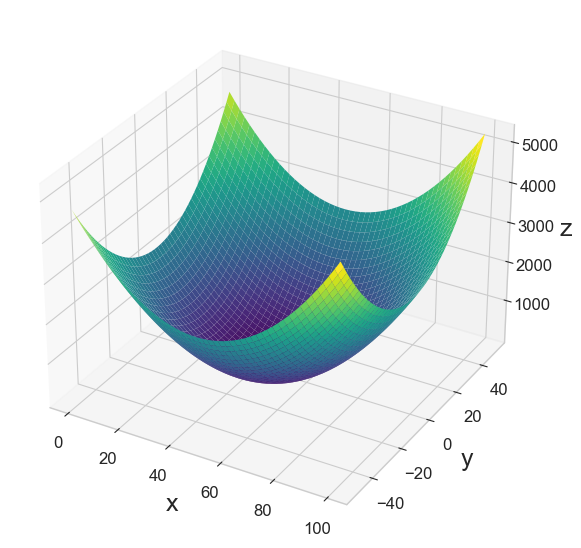

In [3]:
#------------------------
# Find values of function f
#------------------------

# Create points to plot
x = np.linspace(0, 100, 50)
y = np.linspace(-50, 50, 50)

# Makes (x,y) grid for plotting
XYgrid = np.meshgrid(x, y)

# f function output for points on grid
Z = f(XYgrid)

#------------------------
# Create plot of function f
#------------------------

# Make figure size
fig = plt.figure(figsize=(12,7), dpi = 100)

# Make 3d axis for plot
ax = plt.axes(projection='3d')

# Add surface to plot
#------------------------
ax.plot_surface(XYgrid[0], XYgrid[1], Z, rstride = 1, cstride = 1, cmap='viridis', edgecolor='none')

# Create title and label axes
#ax.set_title(r'$f(x,y)$', fontsize = 20);
ax.set_xlabel('x', fontsize = 18)
ax.set_ylabel('y', fontsize = 18)
ax.set_zlabel('z', fontsize = 18)

# Set general font size
plt.rcParams['font.size'] = '12'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontsize(12)
    
# Uncomment to save figure  
#------------------------
plt.savefig('f-function.pdf', bbox_inches='tight', dpi = 300)

# Show plot
#------------------------
plt.show()

Now, we will start our gradient descent algorithm.  Here, we will start at the point $P=(80, 20)$.

In [4]:
#------------------------
# Create variables
#------------------------

# Starting point
x0 = 80
y0 = 20

# Step size to move along gradient
gamma = 0.01

# initialize num of steps to take
totalNumSteps = 0
# create a max number of steps to take
maxSteps = 1000
# how close we want to be to f
tolerance = 0.0001
# initial difference between old and new (x,y) values
diff = 100

# Starting point X=(x0,y0) where X=(x,y)
X = np.array([x0,y0])


#------------------------
# Initialize lists
#------------------------

# creates list of all (x,y) pairs
xyValuesList = [X]
# creates list of all cost function values
fValuesList = [f(X)]
# creates list of the norm between old and new (x,y) values
diffList = [diff]

#------------------------
# Gradient descent calcs
#------------------------

while((totalNumSteps < maxSteps)&(diff > tolerance)):
    
    # Calculate new (x,y) values - move along gradient to new (x,y) position
    newX = X - gamma*gradf(X)
    # Add to list of (x,y) values
    xyValuesList.append(newX)
    
    # Calculate the difference between current and new (x,y) values
    diff = norm(newX-X,2)
    diffList.append(diff)
    
    # Reassign current (x,y) to new (x,y)
    X = newX
    # Add to list of f function values
    fValuesList.append(f(X))
    
    # Add 1 to counter for total number of steps
    totalNumSteps += 1
    
lastValue = xyValuesList[-1]
    
print('The minimum of the function f occurs at the point', lastValue,'after', totalNumSteps, 'time steps.')

The minimum of the function f occurs at the point [47.00411261  0.10248003] after 445 time steps.


We can plot the $(x,y)$ points from our algorithm as well.  First, we create a dataframe with all of the points from the xyValuesList.

In [5]:
#------------------------
# Format data for plot
#------------------------

# Data from above
df = pd.DataFrame(xyValuesList, columns = ['x', 'y'])
df['f(x,y)'] = fValuesList

# Function values of f (to compare)
epsilon = 2
x = np.linspace(min(df['x'])-epsilon, max(df['x']+epsilon), 30)
y = np.linspace(min(df['y'])-epsilon, max(df['y']+epsilon), 30)

# Makes grid for plotting
XYgrid = np.meshgrid(x, y)
# Cost function output for points on grid
Z = f(XYgrid)

We will plot these point on a contour diagram to see how they move toward the minimum of $f$.

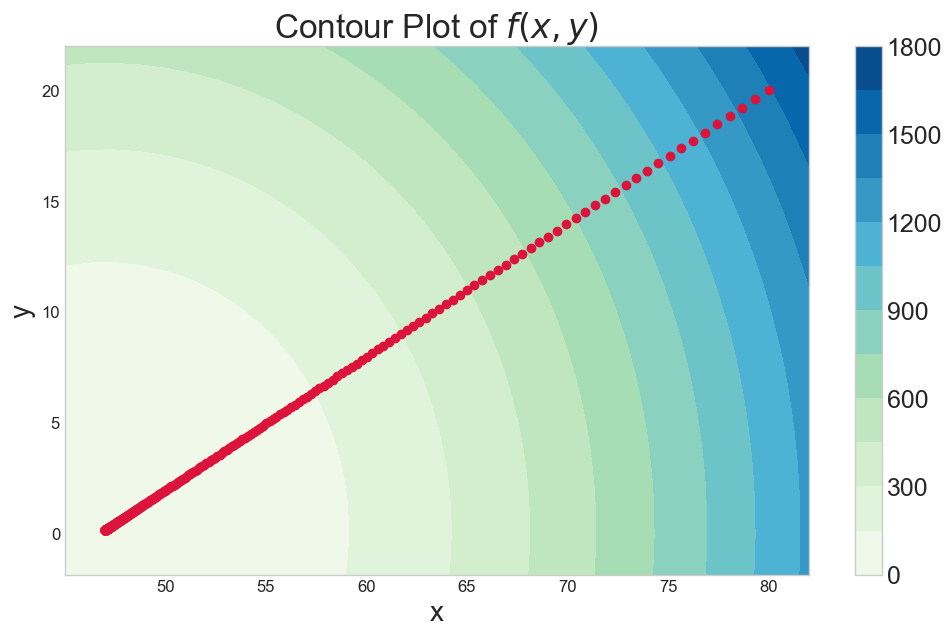

In [6]:
# ------------------------
# Create contour plot
#------------------------

# Make figure size
plt.figure(figsize=(12,7), dpi = 100)

# Create contour plot
#------------------------
plt.contourf(XYgrid[0], XYgrid[1], Z, 15, cmap='GnBu')

# Plot our xyValues
#------------------------
plt.plot(df['x'], df['y'], 'o', color = 'crimson')

# Set general font size
plt.rcParams['font.size'] = '18'
plt.rcParams['axes.grid'] = False

# Label axes and make title
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Contour Plot of $f(x,y)$', fontsize = 24)

# Create colorbar for height
plt.colorbar()

# Uncommment to save figure
#------------------------
plt.savefig('contourPlot.pdf', bbox_inches='tight', dpi= 300)

# Show plot
plt.show()